Make sure to set the runtime to GPU: Runtime -> Change runtime type -> T4 GPU

You can upload your own images, then change the relevant code cells to load it and send it through the model.

In [9]:
# install the intrinsic decomposition repo from github
!pip install https://github.com/compphoto/Intrinsic/archive/main.zip

  Using cached https://github.com/compphoto/Intrinsic/archive/main.zip
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CCareaga/MiDaS (to revision master) to /tmp/pip-install-gf9z4239/altered-midas_a2d634831c0a4964bc9154247ddb154f
  Running command git clone --filter=blob:none --quiet https://github.com/CCareaga/MiDaS /tmp/pip-install-gf9z4239/altered-midas_a2d634831c0a4964bc9154247ddb154f
  Resolved https://github.com/CCareaga/MiDaS to commit ca29fc7041dd11a2347d93046e758bb3c7adaac6
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CCareaga/chrislib (to revision main) to /tmp/pip-install-gf9z4239/chrislib_07d83060ef824c4184a7cf2279845896
  Running command git clone --filter=blob:none --quiet https://github.com/CCareaga/chrislib /tmp/pip-install-gf9z4239/chrislib_07d83060ef824c4184a7cf2279845896
  Resolved https://github.com/CCareaga/chrislib to commit cf818e04e16495e0228d0a418733280538a5857b
  Preparing metadata (setup.py) ... done


In [10]:
import torch

# import some helper functions from chrislib (will be installed by the intrinsic repo)
from chrislib.general import show, view, invert
from chrislib.data_util import load_from_url

# import model loading and running the pipeline
from intrinsic.pipeline import load_models, run_pipeline

import numpy as np
from skimage.color import rgb2gray
from skimage.filters import gaussian
from sklearn.metrics import mean_squared_error

In [11]:
# download the pretrained weights and return the model (may take a bit to download weights the first time)
intrinsic_model = load_models('v2')

Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_0.pt" to /root/.cache/torch/hub/checkpoints/stage_0.pt
100%|██████████| 403M/403M [00:07<00:00, 53.7MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_1.pt" to /root/.cache/torch/hub/checkpoints/stage_1.pt
100%|██████████| 81.8M/81.8M [00:01<00:00, 52.4MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_2.pt" to /root/.cache/torch/hub/checkpoints/stage_2.pt
100%|██████████| 403M/403M [00:07<00:00, 52.9MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_3.pt" to /root/.cache/torch/hub/checkpoints/stage_3.pt
100%|██████████| 403M/403M [00:07<00:00, 55.3MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_4.pt" to /root/.cache/torch/hub/checkpoints/stage_4.pt
100%|██████████| 403M/403M [00:05<00:00, 72.5MB/s]
Downloading: "https://github.com/facebookresearch/WSL-Imag

In [17]:
# load the image to run through the pipeline
img = load_from_url('https://raw.githubusercontent.com/compphoto/Intrinsic/refs/heads/main/figures/canal.png')

In [18]:
# run the image through the pipeline (runs all stages)
result = run_pipeline(
    intrinsic_model,
    img,
    device='cuda'
)

In [21]:
def improved_baseline_albedo(img):
    # Ensure 3-channel output matching original image
    return np.mean(img, axis=2, keepdims=True) * np.ones_like(img)

def improved_baseline_shading(img):
    # Ensure output matches image dimensions
    gray = rgb2gray(img)
    smoothed = gaussian(gray, sigma=1)
    return smoothed[:,:,np.newaxis]

# Example Usage
baseline_alb = improved_baseline_albedo(img)
baseline_dif = improved_baseline_shading(img)

# Evaluate accuracy (without ground truth)
evaluate_accuracy(img, baseline_alb, baseline_dif)

Albedo MSE: 0.0066
Shading MSE: 0.0010


In [22]:
img = result['image']
alb = view(result['hr_alb']) # gamma correct the estimated albedo
dif = 1 - invert(result['dif_shd']) # tonemap the diffuse shading
res = result['residual']

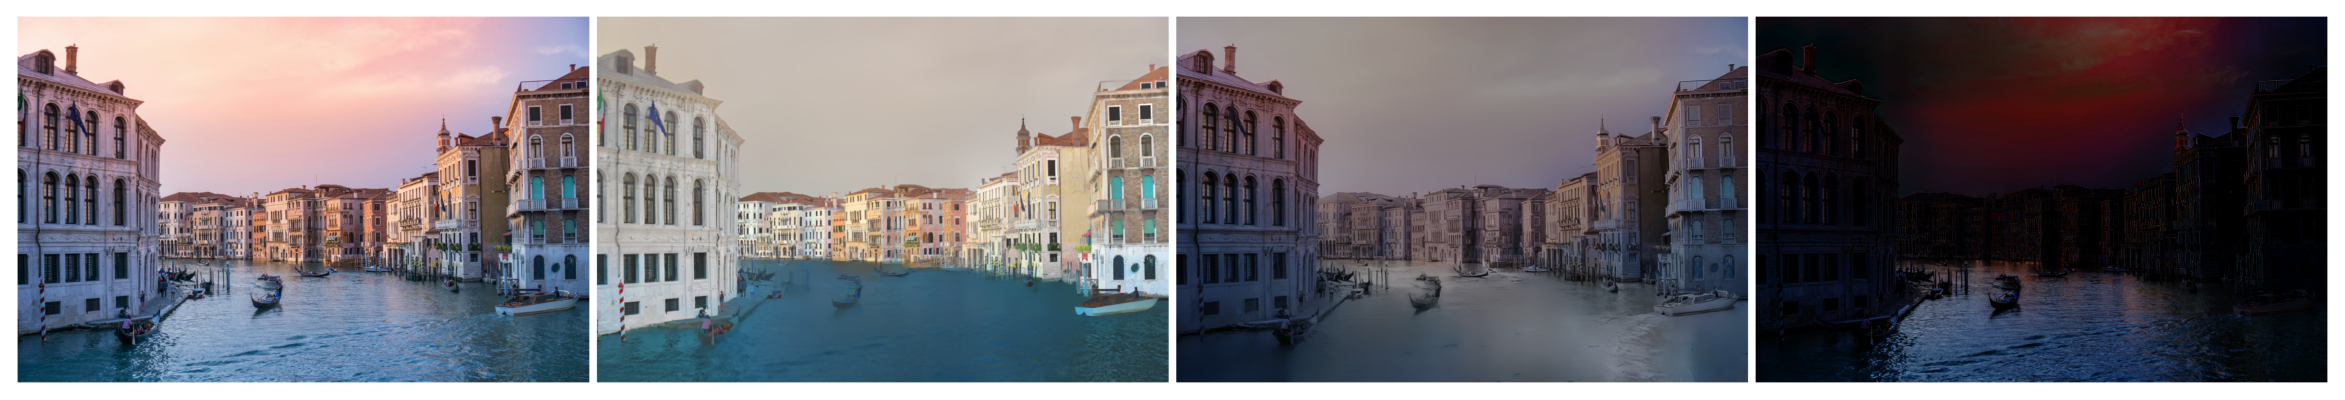

In [23]:
show([img, alb, dif, res], size=(30, 7))

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
